In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

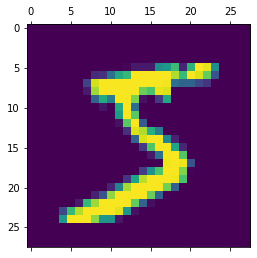

In [7]:
plt.matshow(x_train[0])

In [8]:
y_train[:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
x_train=x_train/255
x_test=x_test/255

In [20]:
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)

In [21]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7400 - accuracy: 0.8048
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3096 - accuracy: 0.9139
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9225
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2620 - accuracy: 0.9264


In [17]:
x_train_flat.shape

(60000, 784)

In [22]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2665 - accuracy: 0.9266


[0.26651477813720703, 0.9265999794006348]

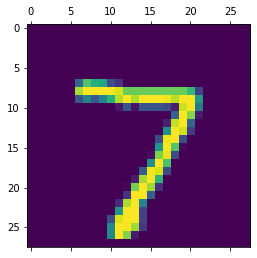

In [25]:
plt.matshow(x_test[0])

In [23]:
y_predicted=model.predict(x_test_flat)
y_predicted[0]

array([2.0043701e-02, 3.4960937e-07, 7.0897102e-02, 9.6290439e-01,
       2.6360452e-03, 1.4402601e-01, 1.8449995e-06, 9.9976087e-01,
       8.7728322e-02, 6.2299591e-01], dtype=float32)

In [24]:
np.argmax(y_predicted[0])

7

In [26]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    5,    2,    3,    0],
       [   0, 1106,    3,    2,    1,    1,    4,    2,   16,    0],
       [   4,    8,  926,   15,    8,    6,   12,    9,   41,    3],
       [   2,    0,   22,  909,    1,   34,    2,    9,   25,    6],
       [   1,    1,    4,    2,  918,    0,   12,    4,   10,   30],
       [   7,    2,    3,   19,    8,  800,   13,    4,   30,    6],
       [   9,    3,    7,    1,    7,   18,  908,    2,    3,    0],
       [   1,    5,   23,    8,    8,    1,    0,  946,    4,   32],
       [   5,    6,    7,   17,    9,   26,    7,   10,  881,    6],
       [  10,    7,    1,   11,   30,    9,    0,   24,    6,  911]])>

Text(69.0, 0.5, 'Truth')

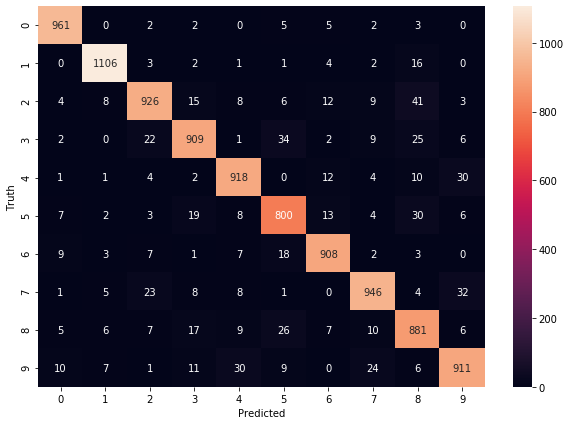

In [28]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4500 - accuracy: 0.8735
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1335 - accuracy: 0.9614
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0878 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0664 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0500 - accuracy: 0.9850


In [30]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 989us/step - loss: 0.0836 - accuracy: 0.9742


[0.08356734365224838, 0.9742000102996826]

In [31]:
y_predicted=model.predict(x_test_flat)
y_predicted[0]

array([2.4554133e-03, 3.1952590e-05, 9.6262366e-02, 9.1694760e-01,
       3.3426695e-06, 5.6622028e-03, 2.5330476e-06, 9.9979019e-01,
       1.3225615e-01, 9.1881782e-02], dtype=float32)

In [32]:
np.argmax(y_predicted[0])

7

In [33]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [34]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    3,    0,    4,    3,    0,    2,    1],
       [   0, 1124,    5,    0,    0,    0,    2,    0,    4,    0],
       [   5,    0, 1003,    6,    4,    1,    3,    3,    7,    0],
       [   0,    0,    4,  995,    0,    2,    0,    3,    4,    2],
       [   0,    0,    4,    0,  964,    2,    4,    0,    0,    8],
       [   1,    0,    0,    8,    1,  878,    1,    0,    2,    1],
       [   5,    3,    0,    1,    4,   15,  929,    0,    1,    0],
       [   1,    6,   13,    9,    3,    1,    0,  976,   10,    9],
       [   3,    1,    1,   10,    3,    6,    2,    1,  945,    2],
       [   1,    7,    0,    8,   10,    8,    1,    2,   11,  961]])>

Text(69.0, 0.5, 'Truth')

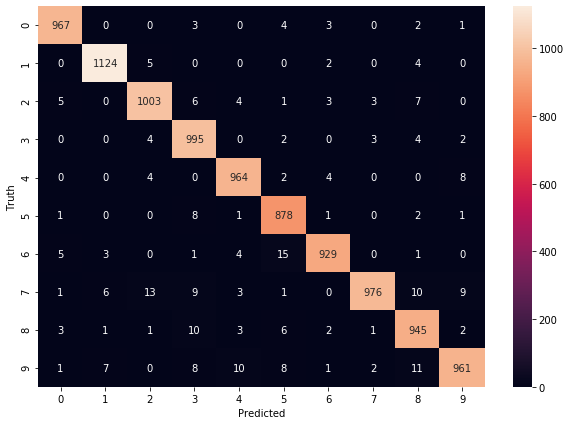

In [35]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4563 - accuracy: 0.8717
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1351 - accuracy: 0.9606
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0837 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0648 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0510 - accuracy: 0.9847
